In [25]:
#!pip install numpy
#!pip install matplotlib
#!pip install scipy
#!pip install scikit-learn
#!pip install pandas

Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

Initial Environmental Conditions Set by the User

In [27]:
g = 9.81
sFriction = 130*g #force in newtons
dFriction = 0.14 #beteween 0.11 and 0.17 coefficient of Friction

Design Parameter Mass Calculations

In [28]:
cartMass = 150
motorMass = 76 #76 or 114 depending on the motor selection
escMass = 42 #42 or 40
propMass = 6 # 6 or 10
structureMass = 100 #change with design 

Motor Data Curves

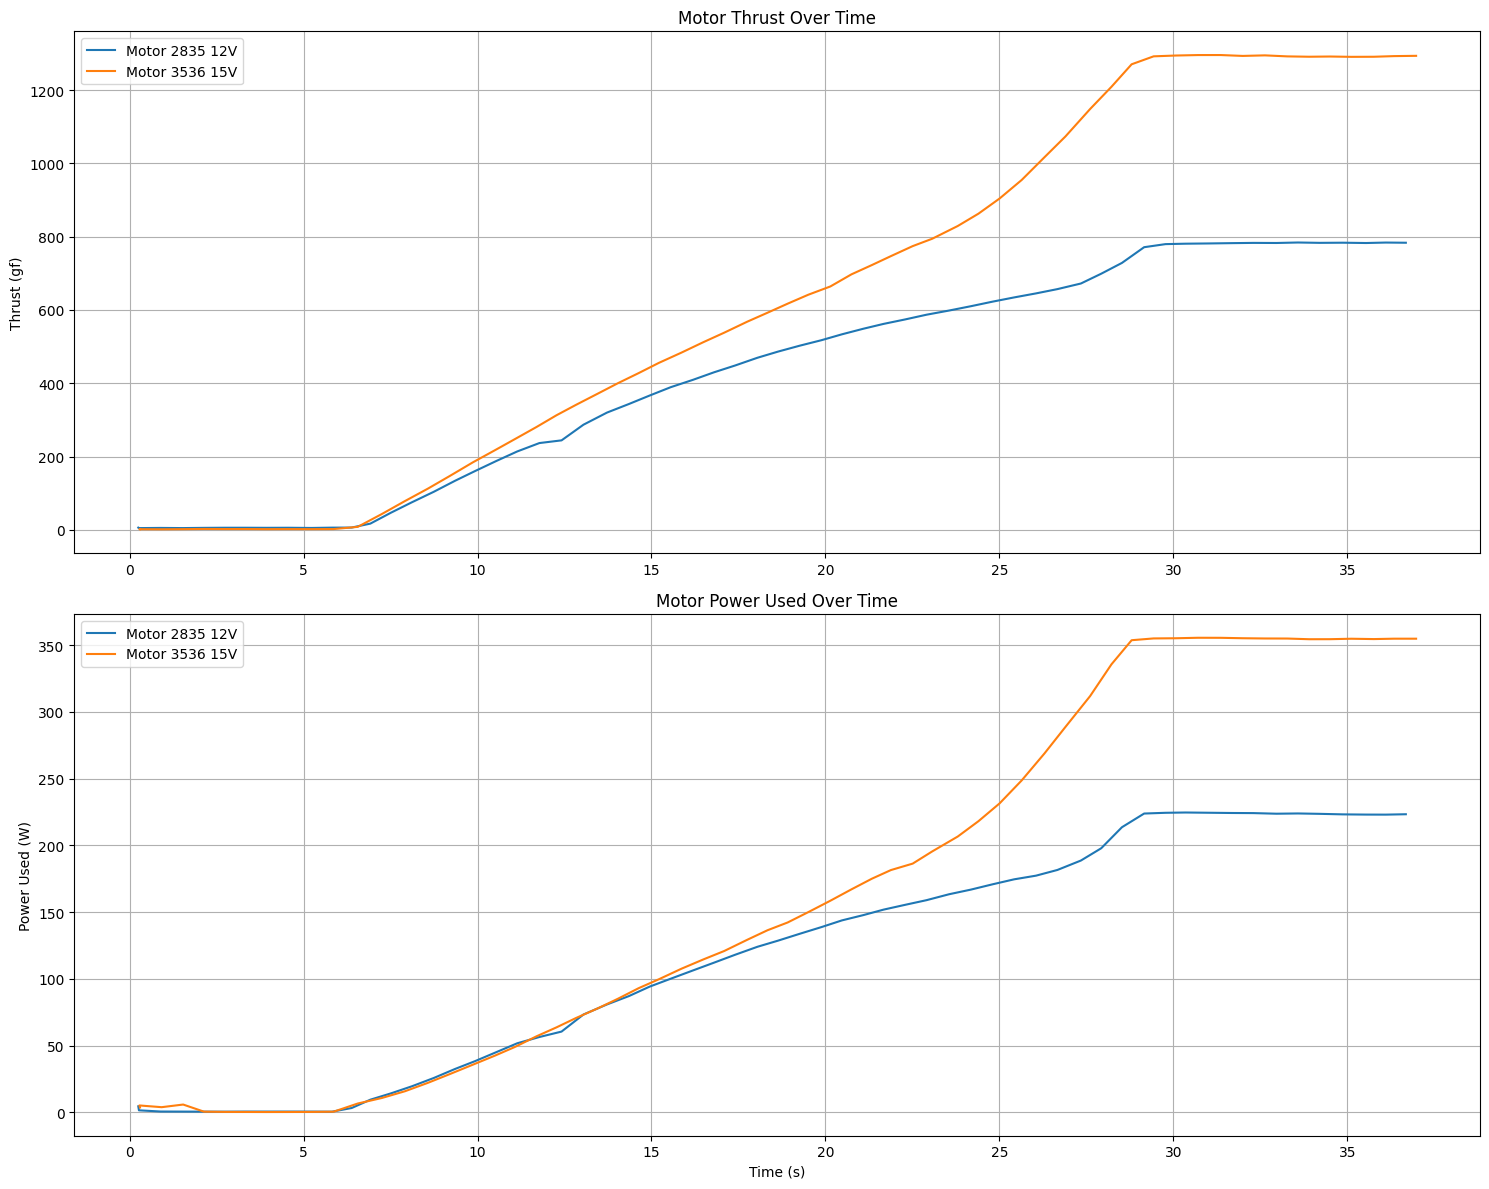

In [33]:
# Load the uploaded CSV files
file_12V = 'Motor Performance Test 2835 12V.csv'
file_15V = 'Motor Performance Test 3536 15V.csv'

df_12V = pd.read_csv(file_12V)
df_15V = pd.read_csv(file_15V)

plt.figure(figsize=(15, 12))

# Thrust
plt.subplot(2, 1, 1)
plt.plot(df_12V['Time (s)'], df_12V['Thrust (gf)'], label='Motor 2835 12V')
plt.plot(df_15V['Time (s)'], df_15V['Thrust (gf)'], label='Motor 3536 15V')
plt.ylabel('Thrust (gf)')
plt.title('Motor Thrust Over Time')
plt.legend()
plt.grid(True)

# Power Used
plt.subplot(2, 1, 2)
plt.plot(df_12V['Time (s)'], df_12V['Electrical Power (W)'], label='Motor 2835 12V')
plt.plot(df_15V['Time (s)'], df_15V['Electrical Power (W)'], label='Motor 3536 15V')
plt.xlabel('Time (s)')
plt.ylabel('Power Used (W)')
plt.title('Motor Power Used Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

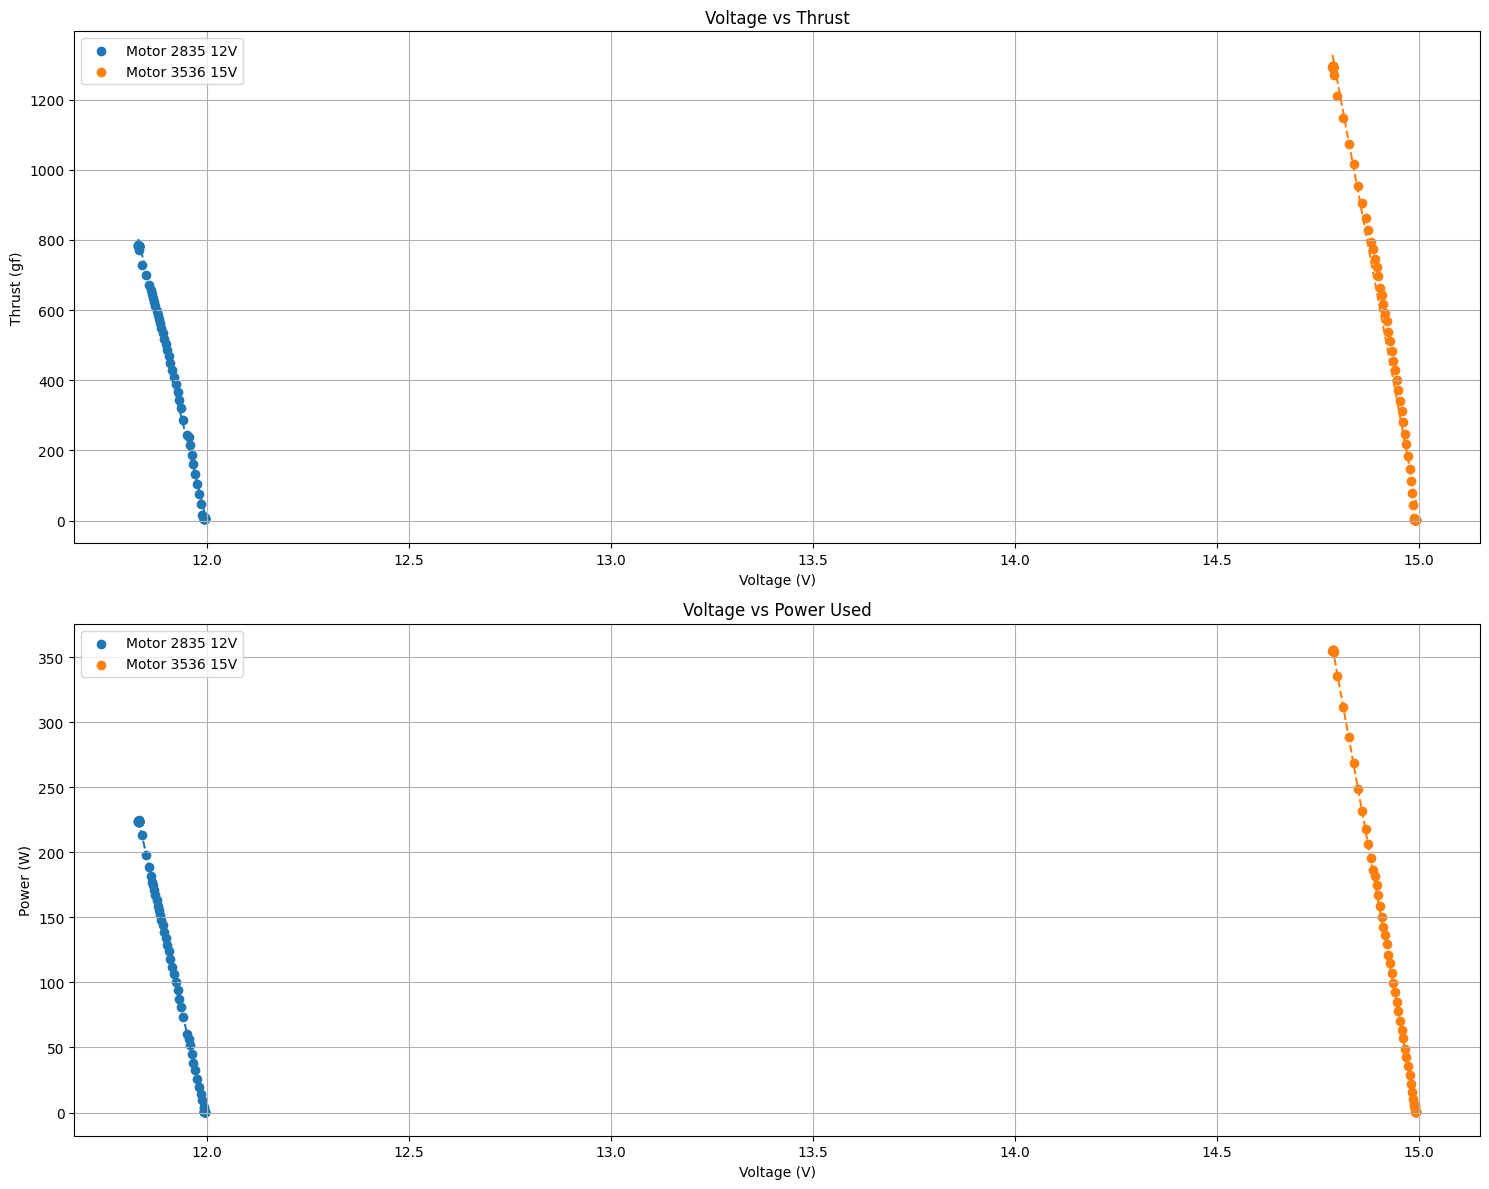

In [34]:
# Prepare figure
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Voltage vs Thrust
for df, label in zip([df_12V, df_15V], ['Motor 2835 12V', 'Motor 3536 15V']):
    axes[0].scatter(df['Voltage (V)'], df['Thrust (gf)'], label=label)
    slope, intercept, *_ = linregress(df['Voltage (V)'], df['Thrust (gf)'])
    x_vals = np.linspace(df['Voltage (V)'].min(), df['Voltage (V)'].max(), 100)
    y_vals = slope * x_vals + intercept
    axes[0].plot(x_vals, y_vals, linestyle='--')

axes[0].set_title('Voltage vs Thrust')
axes[0].set_xlabel('Voltage (V)')
axes[0].set_ylabel('Thrust (gf)')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Voltage vs Power
for df, label in zip([df_12V, df_15V], ['Motor 2835 12V', 'Motor 3536 15V']):
    axes[1].scatter(df['Voltage (V)'], df['Electrical Power (W)'], label=label)
    slope, intercept, *_ = linregress(df['Voltage (V)'], df['Electrical Power (W)'])
    x_vals = np.linspace(df['Voltage (V)'].min(), df['Voltage (V)'].max(), 100)
    y_vals = slope * x_vals + intercept
    axes[1].plot(x_vals, y_vals, linestyle='--')

axes[1].set_title('Voltage vs Power Used')
axes[1].set_xlabel('Voltage (V)')
axes[1].set_ylabel('Power (W)')
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()

In [38]:
# Calculate linear regression equations for each motor

def get_regression_eq(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    equation = f"y = {slope:.4f}x + {intercept:.4f}"
    return equation, r_value**2

# Motor 2835 12V
eq_power_voltage_12V, r2_pv_12V = get_regression_eq(df_12V['Voltage (V)'], df_12V['Electrical Power (W)'])

# Motor 3536 15V
eq_power_voltage_15V, r2_pv_15V = get_regression_eq(df_15V['Voltage (V)'], df_15V['Electrical Power (W)'])

# Update equations dictionary to reflect Power vs Voltage instead of Power vs Thrust
equations_voltage_based = {
    "Motor 2835 12V": {
        "Thrust vs Voltage": f"{eq_thrust_voltage_12V} (R² = {r2_tv_12V:.4f})",
        "Power vs Voltage": f"{eq_power_voltage_12V} (R² = {r2_pv_12V:.4f})"
    },
    "Motor 3536 15V": {
        "Thrust vs Voltage": f"{eq_thrust_voltage_15V} (R² = {r2_tv_15V:.4f})",
        "Power vs Voltage": f"{eq_power_voltage_15V} (R² = {r2_pv_15V:.4f})"
    }
}

equations_voltage_based



{'Motor 2835 12V': {'Thrust vs Voltage': 'y = -4759.7858x + 57112.2391 (R² = 0.9960)',
  'Power vs Voltage': 'y = -1364.5201x + 16368.0715 (R² = 0.9998)'},
 'Motor 3536 15V': {'Thrust vs Voltage': 'y = -6165.2416x + 92486.7957 (R² = 0.9905)',
  'Power vs Voltage': 'y = -1722.7526x + 25830.1069 (R² = 0.9998)'}}

Functions for voltage vs thrust 

In [ ]:
# Motor 2835 12V
def thrust_12V(voltage):
    return -4759.7858 * voltage + 57112.2391

def power_12V(voltage):
    return -1364.5201 * voltage + 16368.0715

# Motor 3536 15V
def thrust_15V(voltage):
    return -6165.2416 * voltage + 92486.7957

def power_15V(voltage):
    return -1722.7526 * voltage + 25830.1069

{'2835_12V': {'thrust_function': <function __main__.thrust_12V(voltage)>,
  'power_function': <function __main__.power_from_thrust_12V(thrust)>,
  'thrust_eq': 'y = -4759.7858x + 57112.2391',
  'power_eq': 'y = 0.2857x - 4.2558'},
 '3536_15V': {'thrust_function': <function __main__.thrust_15V(voltage)>,
  'power_function': <function __main__.power_from_thrust_15V(thrust)>,
  'thrust_eq': 'y = -6165.2416x + 92486.7957',
  'power_eq': 'y = 0.2771x - 12.0144'}}

Sample Test Path

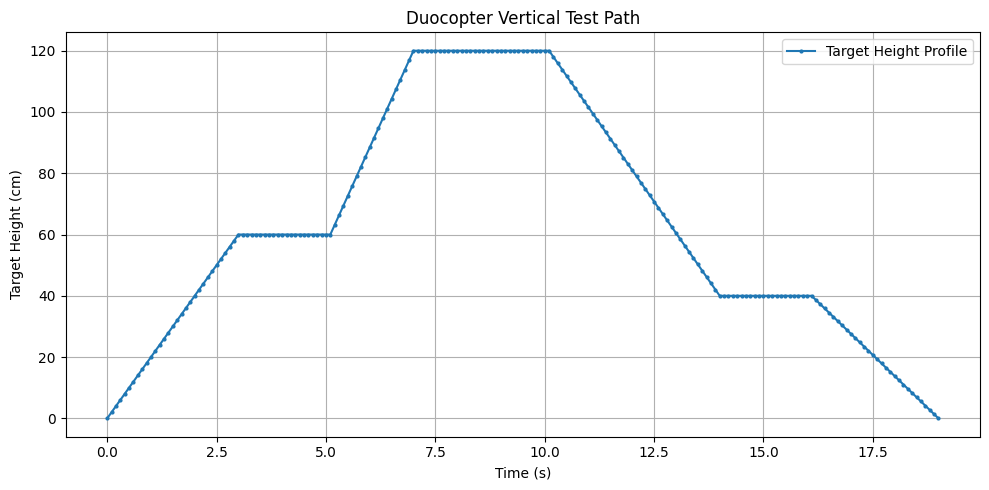

In [31]:

# Define segments
t1 = np.linspace(0, 3, 31)                          # 0 → 60 cm
h1 = np.linspace(0, 60, 31)

t2 = np.linspace(3.1, 5, 20)                        # hold at 60 cm
h2 = np.full(20, 60)

t3 = np.linspace(5.1, 7, 20)                        # 60 → 120 cm
h3 = np.linspace(60, 120, 20)

t4 = np.linspace(7.1, 10, 30)                       # hold at 120 cm
h4 = np.full(30, 120)

t5 = np.linspace(10.1, 14, 40)                      # 120 → 40 cm
h5 = np.linspace(120, 40, 40)

t6 = np.linspace(14.1, 16, 20)                      # hold at 40 cm
h6 = np.full(20, 40)

t7 = np.linspace(16.1, 19, 30)                      # 40 → 0 cm
h7 = np.linspace(40, 0, 30)

# Combine all segments
time = np.concatenate([t1, t2, t3, t4, t5, t6, t7])
height = np.concatenate([h1, h2, h3, h4, h5, h6, h7])

# Create final NumPy array
test_path = np.column_stack((time, height))

# Optional: Save to CSV
np.savetxt("duocopter_test_path.csv", test_path, delimiter=",", header="Time (s),Target Height (cm)", comments='')

# Visualize
plt.figure(figsize=(10, 5))
plt.plot(test_path[:, 0], test_path[:, 1], label='Target Height Profile', marker='o', markersize=2)
plt.title("Duocopter Vertical Test Path")
plt.xlabel("Time (s)")
plt.ylabel("Target Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
